# PROBLEM OF LINEAR REGRESSION

STEP-1 :: Import All Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv("MagicBricks.csv")
df1.sample(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1049,1240.0,3,3.0,Unfurnished,"DLF Capital Greens, Moti Nagar, Kirti Nagar ( ...",1.0,18000000,Ready_to_move,Resale,Apartment,NaN
462,1200.0,3,2.0,Semi-Furnished,Vasant Kunj Sector A,2.0,25000000,Ready_to_move,Resale,Apartment,20833.0
805,1300.0,3,3.0,Semi-Furnished,Chhattarpur,1.0,4400000,Ready_to_move,New_Property,Builder_Floor,4138.0
938,405.0,1,1.0,Unfurnished,"Dilshad Colony, Dilshad Garden",1.0,2500000,Ready_to_move,Resale,Apartment,9200.0
582,3250.0,4,4.0,Semi-Furnished,Safdarjung Enclave carpet area 3250 sqft statu...,1.0,55000000,Ready_to_move,Resale,Builder_Floor,14818.0


# Drop less Contribute Columns To DataFrame

In [3]:
df1.drop(["Status","Transaction","Type","Parking"],axis=1,inplace=True)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1259 non-null   float64
 1   BHK         1259 non-null   int64  
 2   Bathroom    1257 non-null   float64
 3   Furnishing  1254 non-null   object 
 4   Locality    1259 non-null   object 
 5   Price       1259 non-null   int64  
 6   Per_Sqft    1018 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 69.0+ KB


STEP-2 :: After Display The Data Check The Number Of Data Missing In Dataframe

In [5]:
df1.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Price           0
Per_Sqft      241
dtype: int64

In [6]:
df1.shape

(1259, 7)

In [7]:
df1.sample(2)

,Area,BHK,Bathroom,Furnishing,Locality,Price,Per_Sqft
665,2525.0,4,5.0,Semi-Furnished,"Project Commonwealth Games Village 2010, Commo...",43200000,21052.0
1250,1800.0,3,3.0,Semi-Furnished,Chittaranjan Park,29000000,6878.0


In [8]:
df1["Price_per_sqft"] = df1["Price"]/df1["Area"]

In [9]:
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Per_Sqft,Price_per_sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,NaN,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,6667.0,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,6667.0,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,6667.0,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,6667.0,9538.461538


In [10]:
df1.drop(["Per_Sqft"],axis=1,inplace=True)

In [11]:
df2 = df1.fillna({
    "Bathroom":df1["Bathroom"].mode()[0],
    "Furnishing":df1["Furnishing"].mode()[0]
})


In [12]:
df2.isnull().sum()

Area              0
BHK               0
Bathroom          0
Furnishing        0
Locality          0
Price             0
Price_per_sqft    0
dtype: int64

STEP-3 :: Check All The Columns One By One (It's good to check string column series)

In [13]:
df2["BHK"].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

STEP :: Set To "Others" Location If Frequency Is Not More Than 5

In [14]:
location_stats = df2.groupby("Locality")["Locality"].agg("count").sort_values(ascending=False)


In [15]:
location_others=location_stats[~(location_stats>5)]

In [16]:
df2["Locality"] = df2["Locality"].apply(lambda x : "Others" if x in location_others else x)

In [17]:
df2.sample(10)

,Area,BHK,Bathroom,Furnishing,Locality,Price,Price_per_sqft
573,1800.0,4,4.0,Semi-Furnished,Safdarjung Enclave,87500000,48611.111111
956,1000.0,2,2.0,Semi-Furnished,"Dilshad Colony, Dilshad Garden",6700000,6700.000000
223,1500.0,3,2.0,Unfurnished,Others,17400000,11600.000000
844,1000.0,2,2.0,Semi-Furnished,Others,6500000,6500.000000
104,2700.0,4,4.0,Semi-Furnished,Lajpat Nagar 3,55000000,20370.370370
439,850.0,2,3.0,Semi-Furnished,Patel Nagar West,5900000,6941.176471
1200,1700.0,3,4.0,Unfurnished,Hauz Khas,45000000,26470.588235
619,378.0,1,1.0,Unfurnished,Others,3200000,8465.608466
1026,1775.0,3,3.0,Semi-Furnished,"The Amaryllis, Karol Bagh",25500000,14366.197183
765,750.0,2,2.0,Unfurnished,Sultanpur,4000000,5333.333333


STEP-4 :: Domain Knosledge in property i.e mininmum required area for one bedroom is 300sqft, so let's filter it.

In [18]:
df3 = df2[(df2["Area"]/df2["BHK"])>300]

In [19]:
df3[(df3["BHK"]-df3["Bathroom"])>0]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Price_per_sqft
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,15500000,11923.076923
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,10000000,7407.407407
10,1100.0,3,2.0,Semi-Furnished,Others,6200000,5636.363636
33,1080.0,3,2.0,Semi-Furnished,Others,22500000,20833.333333
61,850.0,2,1.0,Semi-Furnished,Others,1900000,2235.294118
...,...,...,...,...,...,...,...
1193,1300.0,3,2.0,Unfurnished,Others,13500000,10384.615385
1242,945.0,2,1.0,Unfurnished,Chittaranjan Park,6500000,6878.306878
1244,1350.0,3,2.0,Semi-Furnished,Others,17500000,12962.962963
1251,1200.0,3,2.0,Semi-Furnished,Chittaranjan Park,15500000,12916.666667


In [20]:
df3.shape

(1048, 7)

STEP-5 :: filter the data by one standard deviation

In [21]:
df3.describe()

,Area,BHK,Bathroom,Price,Price_per_sqft
count,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000
mean,1643.581987,2.834924,2.684160,2.432057e+07,13463.528623
std,1659.070467,0.948755,1.049154,2.695505e+07,7489.135320
min,345.000000,1.000000,1.000000,1.000000e+06,204.081633
25%,969.687750,2.000000,2.000000,7.500000e+06,7566.433566
50%,1350.000000,3.000000,3.000000,1.625000e+07,12307.692308
75%,1800.000000,3.000000,3.000000,2.900000e+07,17716.733871
max,24300.000000,7.000000,7.000000,2.400000e+08,48611.111111


In [22]:
def remove_outlier(df):
    new_df = pd.DataFrame()
    for key,subdf in df.groupby("Locality"):
        m = np.mean(subdf.Price_per_sqft)
        sd = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-sd)) & (subdf.Price_per_sqft<=(m+sd))]
        new_df = pd.concat([new_df,reduced_df],ignore_index=True)
    return new_df
df4 = remove_outlier(df3)

In [23]:
df4.shape

(715, 7)

STEP-6 :: Check Wether amount of lower bhk is not more than higher bhk.

In [24]:
def outlier_removable(location,df):
    bhk_2 = df[(df.Locality==location) & (df.BHK==2)]
    bhk_3 = df[(df.Locality==location) & (df.BHK==3)]
    plt.scatter(bhk_2.Area,bhk_2.Price,label="bhk 2",marker="+",color="red")
    plt.scatter(bhk_3.Area,bhk_3.Price,label="bhk 3",marker="d",color="blue")
    plt.xlabel("Price")
    plt.ylabel("Area_sqft")
    plt.legend()

In [25]:
df3.Locality.value_counts().head(10)

Others                                                406
Lajpat Nagar 3                                         34
Lajpat Nagar 2                                         33
Kailash Colony, Greater Kailash                        30
J R Designers Floors, Rohini Sector 24                 22
Chittaranjan Park                                      22
Saket                                                  21
Mehrauli                                               21
Alaknanda                                              20
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road     18
Name: Locality, dtype: int64

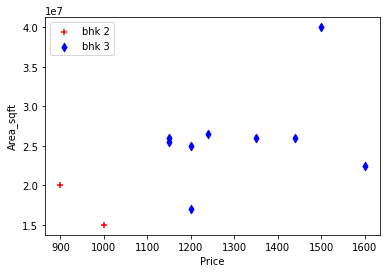

In [26]:
outlier_removable("Kailash Colony, Greater Kailash",df3)

STEP-7 ::"Above Visualozation Conclude that ther is no oulier in this data now we drict go to apply the alogorithm."

In [27]:
furnishing_dummies = pd.get_dummies(df3["Furnishing"],drop_first=True)
locality_dummies = pd.get_dummies(df3["Locality"],drop_first=True)

In [28]:
df4 = pd.concat([df3,furnishing_dummies,locality_dummies],axis=1)

In [29]:
df4.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Price_per_sqft,Semi-Furnished,Unfurnished,Alaknanda,...,Shahdara,Sheikh Sarai Phase 1,"Sukhdev Vihar, Okhla",Sultanpur,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasundhara Enclave,"Yamuna Vihar, Shahdara"
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,6666.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,Furnished,Others,15500000,16315.789474,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,Semi-Furnished,Others,6200000,9538.461538,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,15500000,11923.076923,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,10000000,7407.407407,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = df4.drop(["Furnishing","Locality","Price_per_sqft","Price"],axis=1)

In [31]:
y = df4.Price

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
model.score(X_test,y_test)

0.6073651571176741

STEP-8 :: Apply Grid Search CV for finding Optimum Algorithm and It's Parameters. 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Python 310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Python 310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

C:\Python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.903e+16, tolerance: 6.237e+13
  model = cd_fast.enet_coordinate_descent(
C:\Python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.336e+16, tolerance: 5.943e+13
  model = cd_fast.enet_coordinate_descent(
C:\Python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.459e+16, tolerance: 6.323e+13
  model = cd_fast.en

,model,best_score,best_params
0,linear_regression,0.582631,{'normalize': True}
1,lasso,0.582633,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715826,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# best score = 70-75%

# Hence Best algorithm is decision tree along with its parameters.

In [48]:
import pickle
filename = "trained_model.sav"
pickle.dump(model,open(filename,"wb"))